# Loading the necesssary modules:

In [1]:
import glob
import numpy as np
import xarray as xr

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Defining the necessary functions:

In [2]:
def plot_map(xx, yy, var, ax, box, vmin, vmax, merv, parv, cmap):
    """
    Plots an individual plot of the data using scatter and Basemap.
    Input variables:
    - xx = x-axis variable, in this case, longitude
    - yy = y-axis variable, in this case, latitude
    - var = variable to be plotted
    - ax = axis
    - box = box region of the area wanted to be shown
    , where box is a 1 x 4 array: 
    [minimum_longitude maximum_longitude minimum_latitude maximum_latitude]
    - vmin = minimum value of the colorbar 
    - vmax = maximum value of the colorbar
    - merv = a 1 x 4 array to know if to label and where the meridians
    -- [0 0 0 0] = no labels
    -- [1 0 0 1]
    - parv = like merv, but for the parallels' labels
    - cmap = colormap to be used
    Output variables:
    - pp = plot object
    """
    lomin = box[0]
    lomax = box[1]
    lamin = box[2]
    lamax = box[3]
    
    map = Basemap(llcrnrlon=lomin,llcrnrlat=lamin,urcrnrlon=lomax,urcrnrlat=lamax,
         resolution='i', projection='merc', lat_0 = (lamin+lamax)/2, lon_0 = (lomin+lomax)/2
                  , ax=ax, area_thresh=10)
    map.drawcoastlines()

    map.fillcontinents(color='.75')
    map.drawmeridians(np.arange(-160, 140, 2), labels=merv, size=18)
    map.drawparallels(np.arange(0.5, 70.5, 2), labels=parv, size=18)
    
    pp = map.scatter(xx, yy, s=2, c=var, linewidth='0', vmin=vmin, vmax=vmax, latlon=True
                     , cmap = cmap)
    pp.set_clim([vmin, vmax])
    
    return pp


Source: https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib

In [3]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

## Loading the data:

In [4]:
datadir = '/Users/laura/Documents/scripts/IMEDEA/data/'

# Clims:

In [5]:
clim_k   = [-.02, +.02]
clim_r   = [-.03, +.03]
clim_t   = [-.003, +.003]
clim_p   = [-.03, +.03]
clim_b   = [-.006, +.006]
clim_pd  = [-.12, +.06]
clim_pd1 = [-.02, +.02]

In [6]:
filenames = 'swot_MED_TRY_c02*.nc' 

/Users/laura/Documents/scripts/IMEDEA/data/swot_MED_TRY_c02_p015.nc
/Users/laura/Documents/scripts/IMEDEA/data/swot_MED_TRY_c02_p168.nc


/Users/laura/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


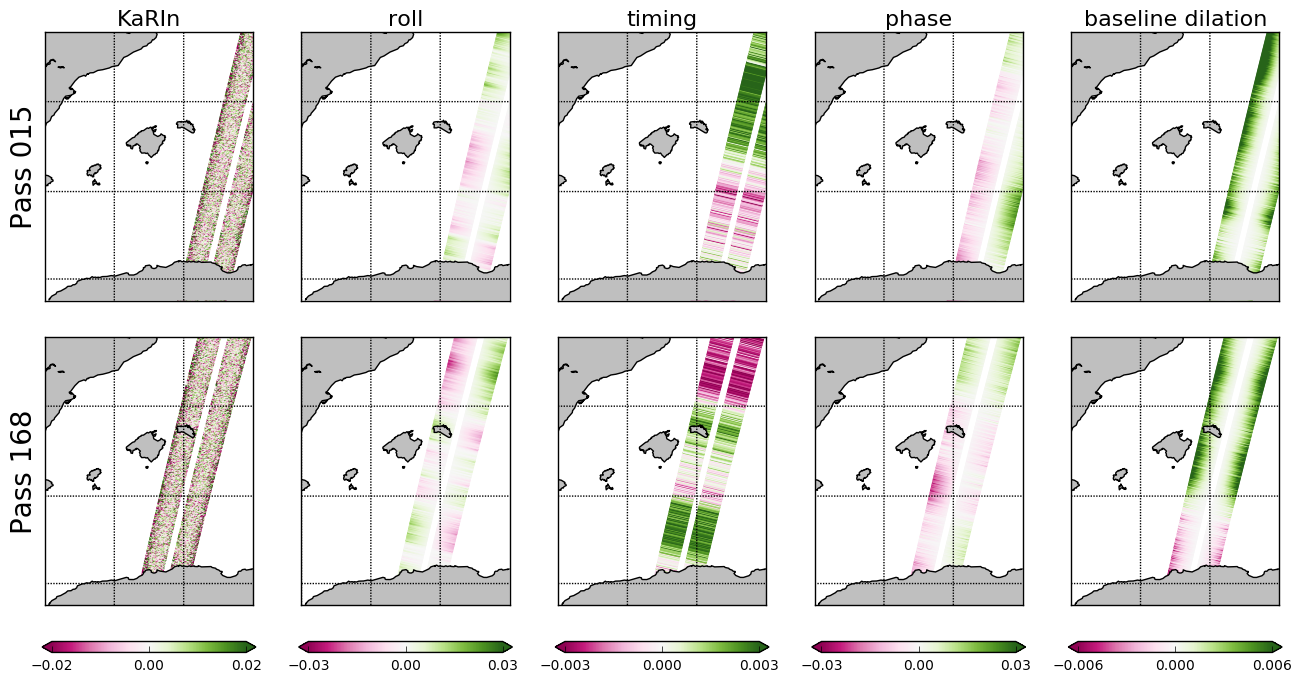

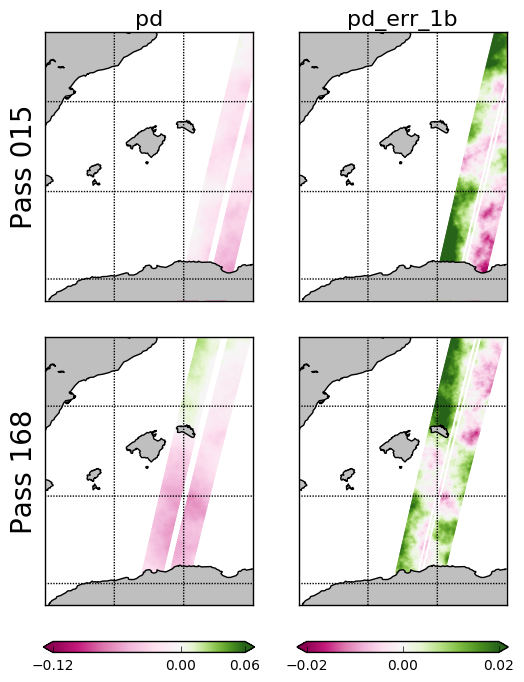

In [7]:
myfiles = sorted(glob.glob(datadir + filenames))
myfiles = list(myfiles[ii] for ii in [1, 9]) # 1 index of p015, 9 index of p168

##================ Plotting parameters ================== 

# Colormap:
cmap = plt.cm.PiYG

midp = 1 - clim_pd[1]/(clim_pd[1] + abs(clim_pd[0]))
shifted_cmap = shiftedColorMap(cmap, midpoint=midp, name='shifted')

# Geographical region limits:
box = [0., 6., 36., 42.] #lomin, lomax, lamin, lamax

fig1 = plt.figure(figsize=(16, 8)) #(4.5*len(myfiles)) + 0.15))

gs1 = gridspec.GridSpec(len(myfiles)+1, 5, height_ratios=[0.98/2, 0.98/2, .02])

axkC = fig1.add_subplot(gs1[-1,0])
axrC = fig1.add_subplot(gs1[-1,1])
axtC = fig1.add_subplot(gs1[-1,2])
axpC = fig1.add_subplot(gs1[-1,3])
axbC = fig1.add_subplot(gs1[-1,4])

fig2 = plt.figure(figsize=(6, 8)) #(4.5*len(myfiles)) + 0.15))

gs2 = gridspec.GridSpec(len(myfiles)+1, 2, height_ratios=[0.98/2, 0.98/2, .02])

axpdC = fig2.add_subplot(gs2[-1,0])
axpd1C = fig2.add_subplot(gs2[-1,1])

######################################

for ii in xrange(0, len(myfiles)):
     
    myfile = myfiles[ii]
    print myfile
    
    # Obtain pass number:
    swotpass = myfile.split('_p')[-1].split('.')[0] 
    npass = np.array(swotpass, dtype=int)
    
    ##====================== Load SWOT data ========================

    xds = xr.open_dataset(myfile, engine='netcdf4', lock=False)
    lon = xds.lon.to_masked_array()
    lat = xds.lat.to_masked_array()
    karin = xds.karin_err.to_masked_array()
    roll = xds.roll_err.to_masked_array()
    timerr = xds.timing_err.to_masked_array()
    phas = xds.phase_err.to_masked_array()
    bd = xds.bd_err.to_masked_array()
    pd = xds.pd.to_masked_array()
    pd1b = xds.pd_err_1b.to_masked_array()
    #pd2b = xds.pd_err_2b
    
    ##================ Plots ================== 
    ax = fig1.add_subplot(gs1[ii,0])
    ppk = plot_map(lon, lat, karin, ax, box, vmin=clim_k[0], vmax=clim_k[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('KaRIn', size=16)
    ax.set_ylabel('Pass ' + swotpass, size=20)
    
    ax = fig1.add_subplot(gs1[ii,1])
    ppr = plot_map(lon, lat, roll, ax, box, vmin=clim_r[0], vmax=clim_r[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('roll', size=16)

    ax = fig1.add_subplot(gs1[ii,2])
    ppt = plot_map(lon, lat, timerr, ax, box, vmin=clim_t[0], vmax=clim_t[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('timing', size=16)

    ax = fig1.add_subplot(gs1[ii,3])
    ppp = plot_map(lon, lat, phas, ax, box, vmin=clim_p[0], vmax=clim_p[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('phase', size=16)

    ax = fig1.add_subplot(gs1[ii,4])
    ppb = plot_map(lon, lat, bd, ax, box, vmin=clim_b[0], vmax=clim_b[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('baseline dilation', size=16)

    ax = fig2.add_subplot(gs2[ii,0])
    pp = plot_map(lon, lat, pd, ax, box, vmin=clim_pd[0], vmax=clim_pd[1], merv = [0,0,0,0]
          , parv = [0,0,0,0], cmap=shifted_cmap)
    if ii==0:
        ax.set_title('pd', size=16)
    ax.set_ylabel('Pass ' + swotpass, size=20)

    ax = fig2.add_subplot(gs2[ii,1])
    pp1 = plot_map(lon, lat, pd1b, ax, box, vmin=clim_pd1[0], vmax=clim_pd1[1], merv = [0,0,0,0]
          , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('pd_err_1b', size=16)

    ##================ Saving the variables ==================
    ##================ As individual arrays ==================
    locals()["lon_c02_p" + swotpass] = lon
    locals()["lat_c02_p" + swotpass] = lat
    locals()["karin_c02_p" + swotpass] = karin
    locals()["roll_c02_p" + swotpass] = roll
    locals()["timerr_c02_p" + swotpass] = timerr
    locals()["phas_c02_p" + swotpass] = phas
    locals()["bd_c02_p" + swotpass] = bd
    locals()["pd_c02_p" + swotpass] = pd
    locals()["pd1b_c02_p" + swotpass] = pd1b
    
##================ General plot settings ================== 

cbar1 = fig1.colorbar(ppk, cax=axkC, orientation='horizontal', extend='both')
cbar2 = fig1.colorbar(ppr, cax=axrC, orientation='horizontal', extend='both')
cbar3 = fig1.colorbar(ppt, cax=axtC, orientation='horizontal', extend='both')
cbar4 = fig1.colorbar(ppp, cax=axpC, orientation='horizontal', extend='both')
cbar5 = fig1.colorbar(ppb, cax=axbC, orientation='horizontal', extend='both')

cbar1.set_ticks([clim_k[0], 0., clim_k[1]])
cbar2.set_ticks([clim_r[0], 0., clim_r[1]])
cbar3.set_ticks([clim_t[0], 0., clim_t[1]])
cbar4.set_ticks([clim_p[0], 0., clim_p[1]])
cbar5.set_ticks([clim_b[0], 0., clim_b[1]])

cbar1 = fig2.colorbar(pp, cax=axpdC, orientation='horizontal', extend='both')
cbar2 = fig2.colorbar(pp1, cax=axpd1C, orientation='horizontal', extend='both')

cbar1.set_ticks([clim_pd[0], 0., clim_pd[1]])
cbar2.set_ticks([clim_pd1[0], 0., clim_pd1[1]])

savedir = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/'

savename1 = savedir + 'NOISE_inst_some_' + filenames.split('*')[0] + '.png'

fig1.savefig(str(savename1), bbox_inches='tight')

savename2 = savedir + 'NOISE_geo_some_' + filenames.split('*')[0] + '.png'

fig2.savefig(str(savename2), bbox_inches='tight')

fig1.show()
fig2.show()


In [8]:
filenames = 'swot_MED_TRY_c30*.nc' 

/Users/laura/Documents/scripts/IMEDEA/data/swot_MED_TRY_c30_p015.nc
/Users/laura/Documents/scripts/IMEDEA/data/swot_MED_TRY_c30_p168.nc


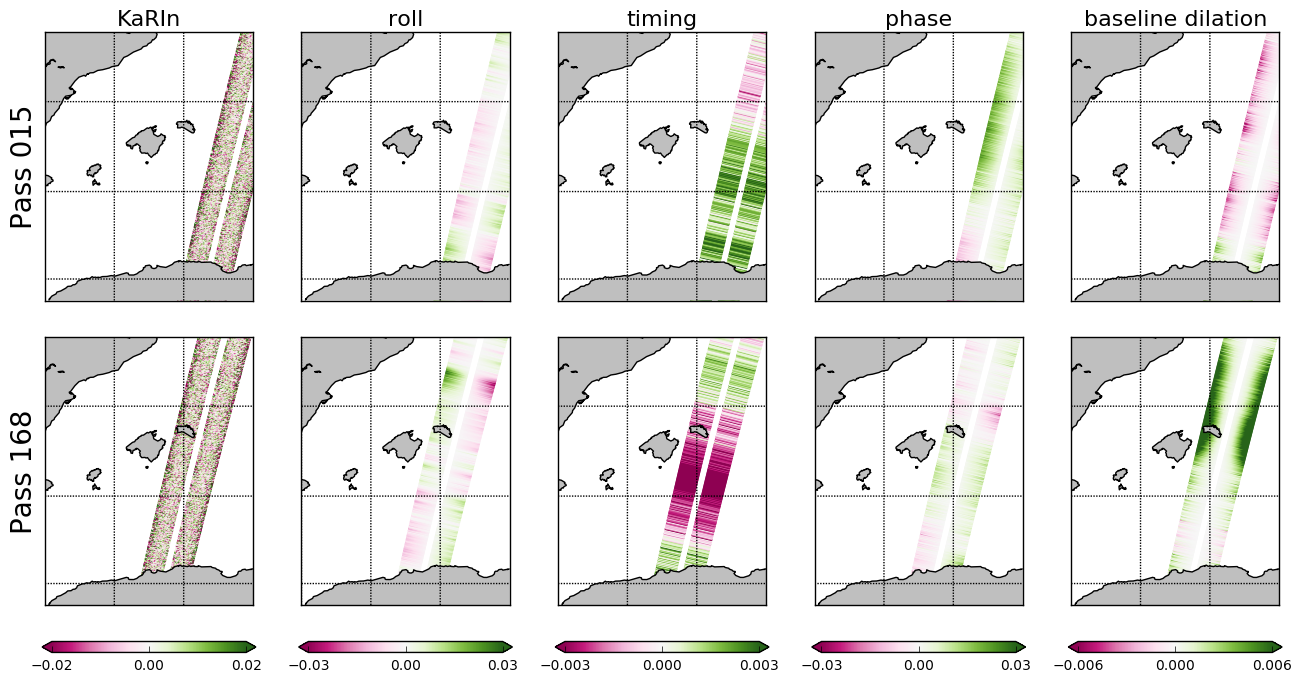

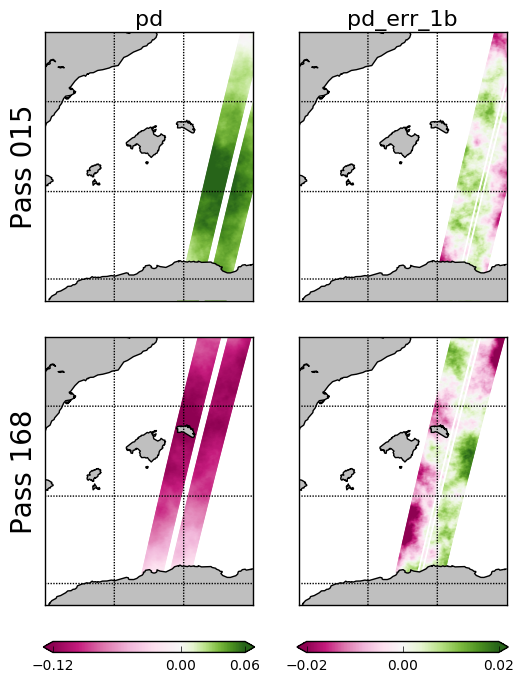

In [9]:
myfiles = sorted(glob.glob(datadir + filenames))
myfiles = list(myfiles[ii] for ii in [1, 9]) # 1 index of p015, 9 index of p168

##================ Plotting parameters ================== 

# Colormap:
cmap = plt.cm.PiYG

midp = 1 - clim_pd[1]/(clim_pd[1] + abs(clim_pd[0]))
shifted_cmap = shiftedColorMap(cmap, midpoint=midp, name='shifted')

# Geographical region limits:
box = [0., 6., 36., 42.] #lomin, lomax, lamin, lamax

fig1 = plt.figure(figsize=(16, 8)) #(4.5*len(myfiles)) + 0.15))

gs1 = gridspec.GridSpec(len(myfiles)+1, 5, height_ratios=[0.98/2, 0.98/2, .02])

axkC = fig1.add_subplot(gs1[-1,0])
axrC = fig1.add_subplot(gs1[-1,1])
axtC = fig1.add_subplot(gs1[-1,2])
axpC = fig1.add_subplot(gs1[-1,3])
axbC = fig1.add_subplot(gs1[-1,4])

fig2 = plt.figure(figsize=(6, 8)) #(4.5*len(myfiles)) + 0.15))

gs2 = gridspec.GridSpec(len(myfiles)+1, 2, height_ratios=[0.98/2, 0.98/2, .02])

axpdC = fig2.add_subplot(gs2[-1,0])
axpd1C = fig2.add_subplot(gs2[-1,1])

######################################

for ii in xrange(0, len(myfiles)):
     
    myfile = myfiles[ii]
    print myfile
    
    # Obtain pass number:
    swotpass = myfile.split('_p')[-1].split('.')[0] 
    npass = np.array(swotpass, dtype=int)
    
    ##====================== Load SWOT data ========================

    xds = xr.open_dataset(myfile, engine='netcdf4', lock=False)
    lon = xds.lon.to_masked_array()
    lat = xds.lat.to_masked_array()
    karin = xds.karin_err.to_masked_array()
    roll = xds.roll_err.to_masked_array()
    timerr = xds.timing_err.to_masked_array()
    phas = xds.phase_err.to_masked_array()
    bd = xds.bd_err.to_masked_array()
    pd = xds.pd.to_masked_array()
    pd1b = xds.pd_err_1b.to_masked_array()
    #pd2b = xds.pd_err_2b
    
    ##================ Plots ================== 
    ax = fig1.add_subplot(gs1[ii,0])
    ppk = plot_map(lon, lat, karin, ax, box, vmin=clim_k[0], vmax=clim_k[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('KaRIn', size=16)
    ax.set_ylabel('Pass ' + swotpass, size=20)
    
    ax = fig1.add_subplot(gs1[ii,1])
    ppr = plot_map(lon, lat, roll, ax, box, vmin=clim_r[0], vmax=clim_r[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('roll', size=16)

    ax = fig1.add_subplot(gs1[ii,2])
    ppt = plot_map(lon, lat, timerr, ax, box, vmin=clim_t[0], vmax=clim_t[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('timing', size=16)

    ax = fig1.add_subplot(gs1[ii,3])
    ppp = plot_map(lon, lat, phas, ax, box, vmin=clim_p[0], vmax=clim_p[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('phase', size=16)

    ax = fig1.add_subplot(gs1[ii,4])
    ppb = plot_map(lon, lat, bd, ax, box, vmin=clim_b[0], vmax=clim_b[1], merv = [0,0,0,0]
              , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('baseline dilation', size=16)

    ax = fig2.add_subplot(gs2[ii,0])
    pp = plot_map(lon, lat, pd, ax, box, vmin=clim_pd[0], vmax=clim_pd[1], merv = [0,0,0,0]
          , parv = [0,0,0,0], cmap=shifted_cmap)
    if ii==0:
        ax.set_title('pd', size=16)
    ax.set_ylabel('Pass ' + swotpass, size=20)

    ax = fig2.add_subplot(gs2[ii,1])
    pp1 = plot_map(lon, lat, pd1b, ax, box, vmin=clim_pd1[0], vmax=clim_pd1[1], merv = [0,0,0,0]
          , parv = [0,0,0,0], cmap=cmap)
    if ii==0:
        ax.set_title('pd_err_1b', size=16)

    ##================ Saving the variables ==================
    ##================ As individual arrays ==================
    locals()["lon_c30_p" + swotpass] = lon
    locals()["lat_c30_p" + swotpass] = lat
    locals()["karin_c30_p" + swotpass] = karin
    locals()["roll_c30_p" + swotpass] = roll
    locals()["timerr_c30_p" + swotpass] = timerr
    locals()["phas_c30_p" + swotpass] = phas
    locals()["bd_c30_p" + swotpass] = bd
    locals()["pd_c30_p" + swotpass] = pd
    locals()["pd1b_c30_p" + swotpass] = pd1b
    
cbar1 = fig1.colorbar(ppk, cax=axkC, orientation='horizontal', extend='both')
cbar2 = fig1.colorbar(ppr, cax=axrC, orientation='horizontal', extend='both')
cbar3 = fig1.colorbar(ppt, cax=axtC, orientation='horizontal', extend='both')
cbar4 = fig1.colorbar(ppp, cax=axpC, orientation='horizontal', extend='both')
cbar5 = fig1.colorbar(ppb, cax=axbC, orientation='horizontal', extend='both')

cbar1.set_ticks([clim_k[0], 0., clim_k[1]])
cbar2.set_ticks([clim_r[0], 0., clim_r[1]])
cbar3.set_ticks([clim_t[0], 0., clim_t[1]])
cbar4.set_ticks([clim_p[0], 0., clim_p[1]])
cbar5.set_ticks([clim_b[0], 0., clim_b[1]])

cbar1 = fig2.colorbar(pp, cax=axpdC, orientation='horizontal', extend='both')
cbar2 = fig2.colorbar(pp1, cax=axpd1C, orientation='horizontal', extend='both')

cbar1.set_ticks([clim_pd[0], 0., clim_pd[1]])
cbar2.set_ticks([clim_pd1[0], 0., clim_pd1[1]])

savedir = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/'

savename1 = savedir + 'NOISE_inst_some_' + filenames.split('*')[0] + '.png'

fig1.savefig(str(savename1), bbox_inches='tight')

savename2 = savedir + 'NOISE_geo_some_' + filenames.split('*')[0] + '.png'

fig2.savefig(str(savename2), bbox_inches='tight')

fig1.show()
fig2.show()
